In [1]:
import geopandas
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
gdf = geopandas.read_file('../2results/GaugeInBuffer_radar_phitsanulok.shp', encoding="TIS-620")
gdf = gdf.to_crs('epsg:4326')

In [3]:
src = rasterio.open("../2results/filtered_cappi2kmdbz_phs.tif")

<AxesSubplot: >

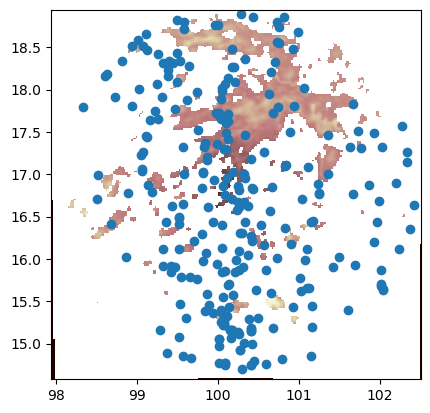

In [4]:
from rasterio.plot import show

fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap="pink")

gdf.plot(ax=ax)

In [5]:
coord_list = [(x, y) for x, y in zip(gdf["geometry"].x, gdf["geometry"].y)]

In [6]:
gdf["value"] = [float(x) for x in src.sample(coord_list)]
gdf.head()

,code,name,lat,long,tambon,amphoe,province,basin,region,station_ty,index_righ,geometry,value
0,BDLH,ทต.ลานหอย,17.008568,99.582944,ลานหอย,บ้านด่านลานหอย,สุโขทัย,แม่น้ำยม,ภาคเหนือ,R,0,POINT (99.58294 17.00857),NaN
1,BSMP,อบต.บึงสามพัน,15.778058,101.020883,บึงสามพัน,บึงสามพัน,เพชรบูรณ์,แม่น้ำป่าสัก,ภาคเหนือ,R,0,POINT (101.02088 15.77806),NaN
2,KRMT,ทต.บ้านโตนด,16.833710,99.802720,โตนด,คีรีมาศ,สุโขทัย,แม่น้ำยม,ภาคเหนือ,R,0,POINT (99.80272 16.83371),NaN
3,LNR1,อบต.ท่ามะนาว,15.199323,101.163878,ท่ามะนาว,ชัยบาดาล,ลพบุรี,แม่น้ำป่าสัก,ภาคกลาง,R,0,POINT (101.16388 15.19932),NaN
4,SBT1,อบต.ชอนสารเดช,15.184949,100.681312,ชอนสารเดช,หนองม่วง,ลพบุรี,แม่น้ำเจ้าพระยา,ภาคกลาง,R,0,POINT (100.68131 15.18495),NaN


In [7]:
gdf.dropna(inplace=True)

In [8]:
gdf.head()

,code,name,lat,long,tambon,amphoe,province,basin,region,station_ty,index_righ,geometry,value
15,LGTI,อบต.บ้านแหง,18.763382,100.008762,บ้านแหง,งาว,ลำปาง,แม่น้ำยม,ภาคเหนือ,R,0,POINT (100.00876 18.76338),23.964209
18,NASW,อบต.นาซ่าว,17.824248,101.669158,นาซ่าว,เชียงคาน,เลย,แม่น้ำโขง,ภาคตะวันออกเฉียงเหนือ,R,0,POINT (101.66916 17.82425),23.161417
19,TPUR,ทต.ภูเรือ,17.457802,101.360646,หนองบัว,ภูเรือ,เลย,แม่น้ำโขง,ภาคตะวันออกเฉียงเหนือ,R,0,POINT (101.36065 17.45780),21.306984
40,KGTP,ทต.คุ้งตะเภา,17.625312,100.123667,คุ้งตะเภา,เมืองอุตรดิตถ์,อุตรดิตถ์,แม่น้ำน่าน,ภาคเหนือ,R,0,POINT (100.12367 17.62531),17.518892
42,RGKG,อบต.ร้องกวาง,18.358837,100.333907,ร้องกวาง,ร้องกวาง,แพร่,แม่น้ำยม,ภาคเหนือ,R,0,POINT (100.33391 18.35884),23.228680


In [9]:
gdf.rename(columns={"value": "dBZ"}, inplace=True)

In [10]:
gdf.head()

,code,name,lat,long,tambon,amphoe,province,basin,region,station_ty,index_righ,geometry,dBZ
15,LGTI,อบต.บ้านแหง,18.763382,100.008762,บ้านแหง,งาว,ลำปาง,แม่น้ำยม,ภาคเหนือ,R,0,POINT (100.00876 18.76338),23.964209
18,NASW,อบต.นาซ่าว,17.824248,101.669158,นาซ่าว,เชียงคาน,เลย,แม่น้ำโขง,ภาคตะวันออกเฉียงเหนือ,R,0,POINT (101.66916 17.82425),23.161417
19,TPUR,ทต.ภูเรือ,17.457802,101.360646,หนองบัว,ภูเรือ,เลย,แม่น้ำโขง,ภาคตะวันออกเฉียงเหนือ,R,0,POINT (101.36065 17.45780),21.306984
40,KGTP,ทต.คุ้งตะเภา,17.625312,100.123667,คุ้งตะเภา,เมืองอุตรดิตถ์,อุตรดิตถ์,แม่น้ำน่าน,ภาคเหนือ,R,0,POINT (100.12367 17.62531),17.518892
42,RGKG,อบต.ร้องกวาง,18.358837,100.333907,ร้องกวาง,ร้องกวาง,แพร่,แม่น้ำยม,ภาคเหนือ,R,0,POINT (100.33391 18.35884),23.228680


In [11]:
gdf['dBZ']

15     23.964209
18     23.161417
19     21.306984
40     17.518892
42     23.228680
50     22.014683
51     33.528118
59      4.176013
64     28.301857
66     20.500000
70     24.173655
71     17.138390
74     20.477114
79     22.520290
80     21.125849
81     17.500000
93     16.295115
99     20.712746
105    18.954241
123    20.861889
136    20.959019
137    20.109425
138    26.296495
141    27.873425
143    21.660425
145    20.801790
146    24.441710
167    19.118258
173    18.026407
198    23.667414
213    23.506531
214     7.000000
215     4.500000
220    15.356242
230    14.353753
231    23.637177
233    24.443285
258    22.606388
Name: dBZ, dtype: float64

In [12]:
def dBZ_to_rainrate_by_zr(dBZ, a=200, b=1.6):
    z = 10**(dBZ/10)
    r = (z/a)**(1/b)
    return r

In [13]:
dBZ_to_rainrate_by_zr(gdf['dBZ'])

15     1.147148
18     1.021986
19     0.782605
40     0.453719
42     1.031926
50     0.866511
51     4.543219
59     0.066505
64     2.141521
66     0.696797
70     1.182251
71     0.429542
74     0.694506
79     0.931911
80     0.762468
81     0.452487
93     0.380453
99     0.718460
105    0.557823
123    0.734048
136    0.744380
137    0.658712
138    1.604675
141    2.013471
143    0.823442
145    0.727726
146    1.228749
167    0.571146
173    0.488098
198    1.099182
213    1.074025
214    0.099852
215    0.069680
220    0.332370
230    0.287717
231    1.094409
233    1.229027
258    0.943530
Name: dBZ, dtype: float64

In [14]:
gdf.columns

Index(['code', 'name', 'lat', 'long', 'tambon', 'amphoe', 'province', 'basin',
       'region', 'station_ty', 'index_righ', 'geometry', 'dBZ'],
      dtype='object')

In [15]:
gdf['rr_MP']=dBZ_to_rainrate_by_zr(gdf['dBZ'])

In [16]:
gdf.columns

Index(['code', 'name', 'lat', 'long', 'tambon', 'amphoe', 'province', 'basin',
       'region', 'station_ty', 'index_righ', 'geometry', 'dBZ', 'rr_MP'],
      dtype='object')

In [17]:
gdf['rr_RF']=dBZ_to_rainrate_by_zr(gdf['dBZ'],a=250,b=1.2)

In [18]:
gdf.columns

Index(['code', 'name', 'lat', 'long', 'tambon', 'amphoe', 'province', 'basin',
       'region', 'station_ty', 'index_righ', 'geometry', 'dBZ', 'rr_MP',
       'rr_RF'],
      dtype='object')

In [19]:
gdf.columns

Index(['code', 'name', 'lat', 'long', 'tambon', 'amphoe', 'province', 'basin',
       'region', 'station_ty', 'index_righ', 'geometry', 'dBZ', 'rr_MP',
       'rr_RF'],
      dtype='object')

In [20]:
gdf

,code,name,lat,long,tambon,amphoe,province,basin,region,station_ty,index_righ,geometry,dBZ,rr_MP,rr_RF
15,LGTI,อบต.บ้านแหง,18.763382,100.008762,บ้านแหง,งาว,ลำปาง,แม่น้ำยม,ภาคเหนือ,R,0,POINT (100.00876 18.76338),23.964209,1.147148,0.997089
18,NASW,อบต.นาซ่าว,17.824248,101.669158,นาซ่าว,เชียงคาน,เลย,แม่น้ำโขง,ภาคตะวันออกเฉียงเหนือ,R,0,POINT (101.66916 17.82425),23.161417,1.021986,0.854741
19,TPUR,ทต.ภูเรือ,17.457802,101.360646,หนองบัว,ภูเรือ,เลย,แม่น้ำโขง,ภาคตะวันออกเฉียงเหนือ,R,0,POINT (101.36065 17.45780),21.306984,0.782605,0.598823
40,KGTP,ทต.คุ้งตะเภา,17.625312,100.123667,คุ้งตะเภา,เมืองอุตรดิตถ์,อุตรดิตถ์,แม่น้ำน่าน,ภาคเหนือ,R,0,POINT (100.12367 17.62531),17.518892,0.453719,0.289484
42,RGKG,อบต.ร้องกวาง,18.358837,100.333907,ร้องกวาง,ร้องกวาง,แพร่,แม่น้ำยม,ภาคเหนือ,R,0,POINT (100.33391 18.35884),23.228680,1.031926,0.865845
50,SRKT,อบต.ท่าแฝก,17.945717,100.631066,ท่าแฝก,ท่าปลา,อุตรดิตถ์,แม่น้ำน่าน,ภาคเหนือ,R,0,POINT (100.63107 17.94572),22.014683,0.866511,0.685920
51,CEHM,อบต.แจ้ห่ม,18.712304,99.582067,แจ้ห่ม,แจ้ห่ม,ลำปาง,แม่น้ำวัง,ภาคเหนือ,R,0,POINT (99.58207 18.71230),33.528118,4.543219,6.247791
59,BRKM,ทต.บางระกำเมืองใหม่,16.748904,100.090278,บางระกำ,บางระกำ,พิษณุโลก,แม่น้ำยม,ภาคเหนือ,R,0,POINT (100.09028 16.74890),4.176013,0.066505,0.022373
64,WGSA,ทต.กลางเวียง,18.566186,100.735514,กลางเวียง,เวียงสา,น่าน,แม่น้ำน่าน,ภาคเหนือ,R,0,POINT (100.73551 18.56619),28.301857,2.141521,2.291948
66,NAMN,สนามกีฬา ทต.บ่อแก้ว,18.210474,100.662432,บ่อแก้ว,นาหมื่น,น่าน,แม่น้ำน่าน,ภาคเหนือ,R,0,POINT (100.66243 18.21047),20.500000,0.696797,0.512920


In [21]:
gdf.columns

Index(['code', 'name', 'lat', 'long', 'tambon', 'amphoe', 'province', 'basin',
       'region', 'station_ty', 'index_righ', 'geometry', 'dBZ', 'rr_MP',
       'rr_RF'],
      dtype='object')

In [22]:
gdf['rr_SC']=dBZ_to_rainrate_by_zr(gdf['dBZ'],a=300,b=1.4)

In [23]:
gdf.columns

Index(['code', 'name', 'lat', 'long', 'tambon', 'amphoe', 'province', 'basin',
       'region', 'station_ty', 'index_righ', 'geometry', 'dBZ', 'rr_MP',
       'rr_RF', 'rr_SC'],
      dtype='object')

In [24]:
df = gdf[['code', 'dBZ', 'rr_MP','rr_RF', 'rr_SC']]

In [25]:
df.columns

Index(['code', 'dBZ', 'rr_MP', 'rr_RF', 'rr_SC'], dtype='object')

In [26]:
df.corr()

,dBZ,rr_MP,rr_RF,rr_SC
dBZ,1.000000,0.786758,0.687987,0.742785
rr_MP,0.786758,1.000000,0.986923,0.997240
rr_RF,0.687987,0.986923,1.000000,0.996150
rr_SC,0.742785,0.997240,0.996150,1.000000


In [27]:
df.dropna(inplace=True)

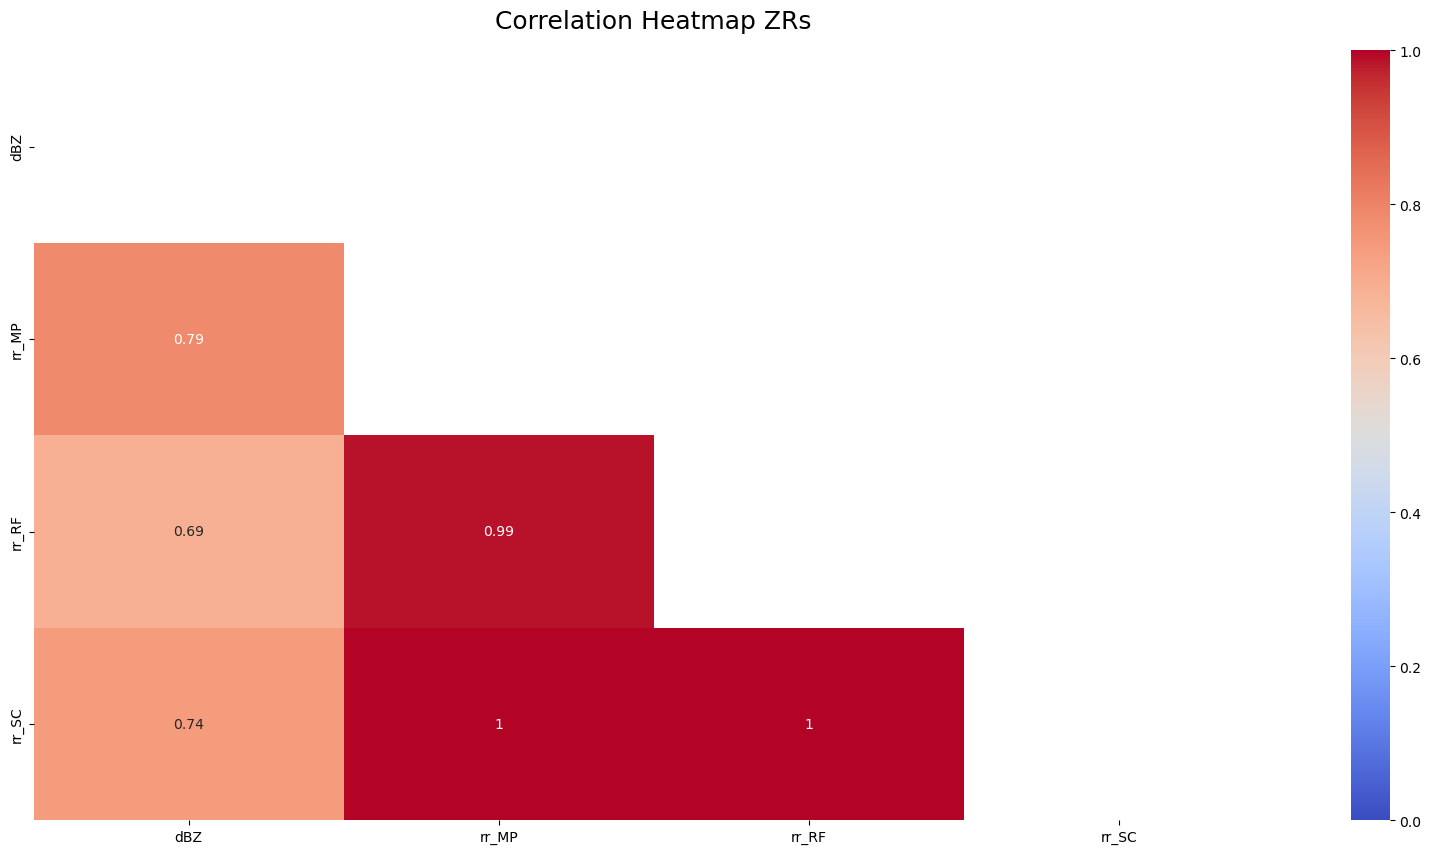

In [28]:
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap ZRs', fontdict={'fontsize':18}, pad=16);

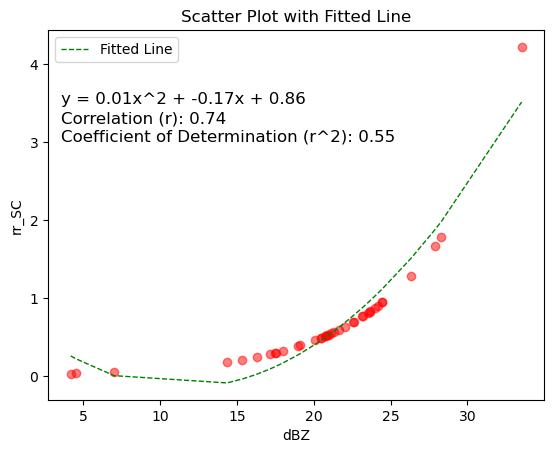

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# กำหนดค่า x y ที่จะพลอต
x = df['dBZ']
y = df['rr_SC']

# พลอตจุด
plt.scatter(x, y, c='red', alpha=0.5)

# คำนวณหาพารามิเตอร์ที่ให้เส้นตรงที่ fit กับจุดมากที่สุด a=ความชัน b=จุดตัดแกน y
a = np.polyfit(x, y, 2)

# พลอตเส้นตรง
sx=np.sort(x)
plt.plot(sx, (a[0]*(sx**2))+(a[1]*sx)+(a[2]), color='green', linestyle='--', linewidth=1, label='Fitted Line')

# เพิ่มสมการ
#equation = 'y = {:.2f} + {:.2f}x'.format(b, a)
equation = 'y = {:.2f}x^2 + {:.2f}x + {:.2f}'.format(a[0], a[1], a[2])
plt.text(0.025, 0.8, equation, fontsize=12, transform=plt.gca().transAxes)

# คำนวณค่าสหสัมพันธ์(r) และค่า coefficient of determination (r^2)
correlation_matrix = np.corrcoef(x, y)
correlation_coefficient = correlation_matrix[0, 1]
coefficient_of_determination = correlation_coefficient ** 2

# แสดงตัวผล r / r^2 ในกราฟ
info_text = 'Correlation (r): {:.2f}\nCoefficient of Determination (r^2): {:.2f}'.format(correlation_coefficient, coefficient_of_determination)
plt.text(0.025, 0.7, info_text, fontsize=12, transform=plt.gca().transAxes)


# Customize your plot as needed
plt.title('Scatter Plot with Fitted Line')
plt.xlabel('dBZ')
plt.ylabel('rr_SC')
plt.legend()
plt.show()

## พลอตกราฟความสัมพันธ์ dBz กับ rr..

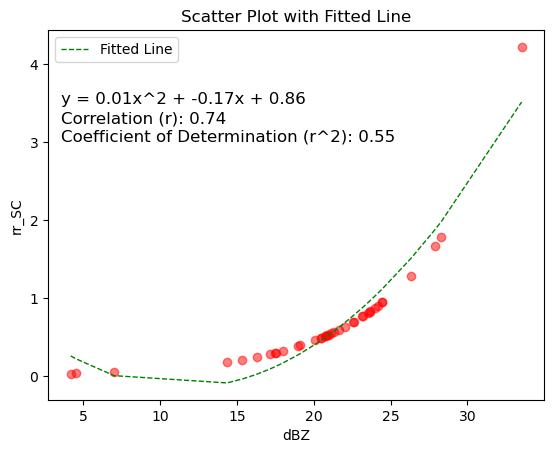

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# กำหนดค่า x y ที่จะพลอต
x = df['dBZ']
y = df['rr_SC']

# พลอตจุด
plt.scatter(x, y, c='red', alpha=0.5)

# คำนวณหาพารามิเตอร์ที่ให้เส้นตรงที่ fit กับจุดมากที่สุด a=ความชัน b=จุดตัดแกน y
a = np.polyfit(x, y, 2)

# พลอตเส้นตรง
sx=np.sort(x)
plt.plot(sx, (a[0]*(sx**2))+(a[1]*sx)+(a[2]), color='green', linestyle='--', linewidth=1, label='Fitted Line')

# เพิ่มสมการ
#equation = 'y = {:.2f} + {:.2f}x'.format(b, a)
equation = 'y = {:.2f}x^2 + {:.2f}x + {:.2f}'.format(a[0], a[1], a[2])
plt.text(0.025, 0.8, equation, fontsize=12, transform=plt.gca().transAxes)

# คำนวณค่าสหสัมพันธ์(r) และค่า coefficient of determination (r^2)
correlation_matrix = np.corrcoef(x, y)
correlation_coefficient = correlation_matrix[0, 1]
coefficient_of_determination = correlation_coefficient ** 2

# แสดงตัวผล r / r^2 ในกราฟ
info_text = 'Correlation (r): {:.2f}\nCoefficient of Determination (r^2): {:.2f}'.format(correlation_coefficient, coefficient_of_determination)
plt.text(0.025, 0.7, info_text, fontsize=12, transform=plt.gca().transAxes)


# Customize your plot as needed
plt.title('Scatter Plot with Fitted Line')
plt.xlabel('dBZ')
plt.ylabel('rr_SC')
plt.legend()
plt.show()

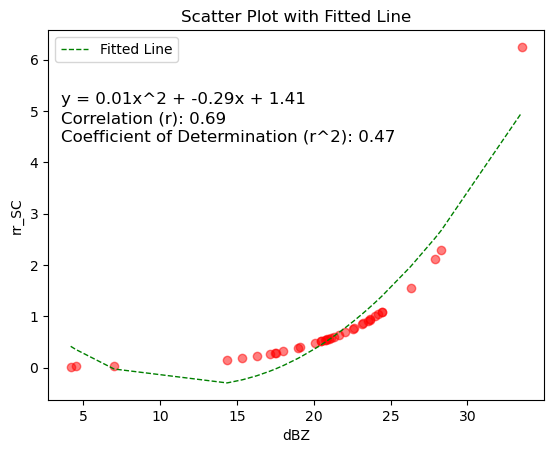

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# กำหนดค่า x y ที่จะพลอต
x = df['dBZ']
y = df['rr_RF']

# พลอตจุด
plt.scatter(x, y, c='red', alpha=0.5)

# คำนวณหาพารามิเตอร์ที่ให้เส้นตรงที่ fit กับจุดมากที่สุด a=ความชัน b=จุดตัดแกน y
a = np.polyfit(x, y, 2)

# พลอตเส้นตรง
sx=np.sort(x)
plt.plot(sx, (a[0]*(sx**2))+(a[1]*sx)+(a[2]), color='green', linestyle='--', linewidth=1, label='Fitted Line')

# เพิ่มสมการ
#equation = 'y = {:.2f} + {:.2f}x'.format(b, a)
equation = 'y = {:.2f}x^2 + {:.2f}x + {:.2f}'.format(a[0], a[1], a[2])
plt.text(0.025, 0.8, equation, fontsize=12, transform=plt.gca().transAxes)

# คำนวณค่าสหสัมพันธ์(r) และค่า coefficient of determination (r^2)
correlation_matrix = np.corrcoef(x, y)
correlation_coefficient = correlation_matrix[0, 1]
coefficient_of_determination = correlation_coefficient ** 2

# แสดงตัวผล r / r^2 ในกราฟ
info_text = 'Correlation (r): {:.2f}\nCoefficient of Determination (r^2): {:.2f}'.format(correlation_coefficient, coefficient_of_determination)
plt.text(0.025, 0.7, info_text, fontsize=12, transform=plt.gca().transAxes)


# Customize your plot as needed
plt.title('Scatter Plot with Fitted Line')
plt.xlabel('dBZ')
plt.ylabel('rr_SC')
plt.legend()
plt.show()

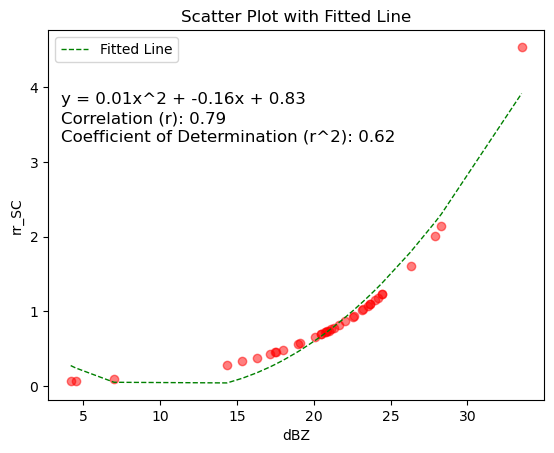

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# กำหนดค่า x y ที่จะพลอต
x = df['dBZ']
y = df['rr_MP']

# พลอตจุด
plt.scatter(x, y, c='red', alpha=0.5)

# คำนวณหาพารามิเตอร์ที่ให้เส้นตรงที่ fit กับจุดมากที่สุด a=ความชัน b=จุดตัดแกน y
a = np.polyfit(x, y, 2)

# พลอตเส้นตรง
sx=np.sort(x)
plt.plot(sx, (a[0]*(sx**2))+(a[1]*sx)+(a[2]), color='green', linestyle='--', linewidth=1, label='Fitted Line')

# เพิ่มสมการ
#equation = 'y = {:.2f} + {:.2f}x'.format(b, a)
equation = 'y = {:.2f}x^2 + {:.2f}x + {:.2f}'.format(a[0], a[1], a[2])
plt.text(0.025, 0.8, equation, fontsize=12, transform=plt.gca().transAxes)

# คำนวณค่าสหสัมพันธ์(r) และค่า coefficient of determination (r^2)
correlation_matrix = np.corrcoef(x, y)
correlation_coefficient = correlation_matrix[0, 1]
coefficient_of_determination = correlation_coefficient ** 2

# แสดงตัวผล r / r^2 ในกราฟ
info_text = 'Correlation (r): {:.2f}\nCoefficient of Determination (r^2): {:.2f}'.format(correlation_coefficient, coefficient_of_determination)
plt.text(0.025, 0.7, info_text, fontsize=12, transform=plt.gca().transAxes)


# Customize your plot as needed
plt.title('Scatter Plot with Fitted Line')
plt.xlabel('dBZ')
plt.ylabel('rr_SC')
plt.legend()
plt.show()

## pair plot

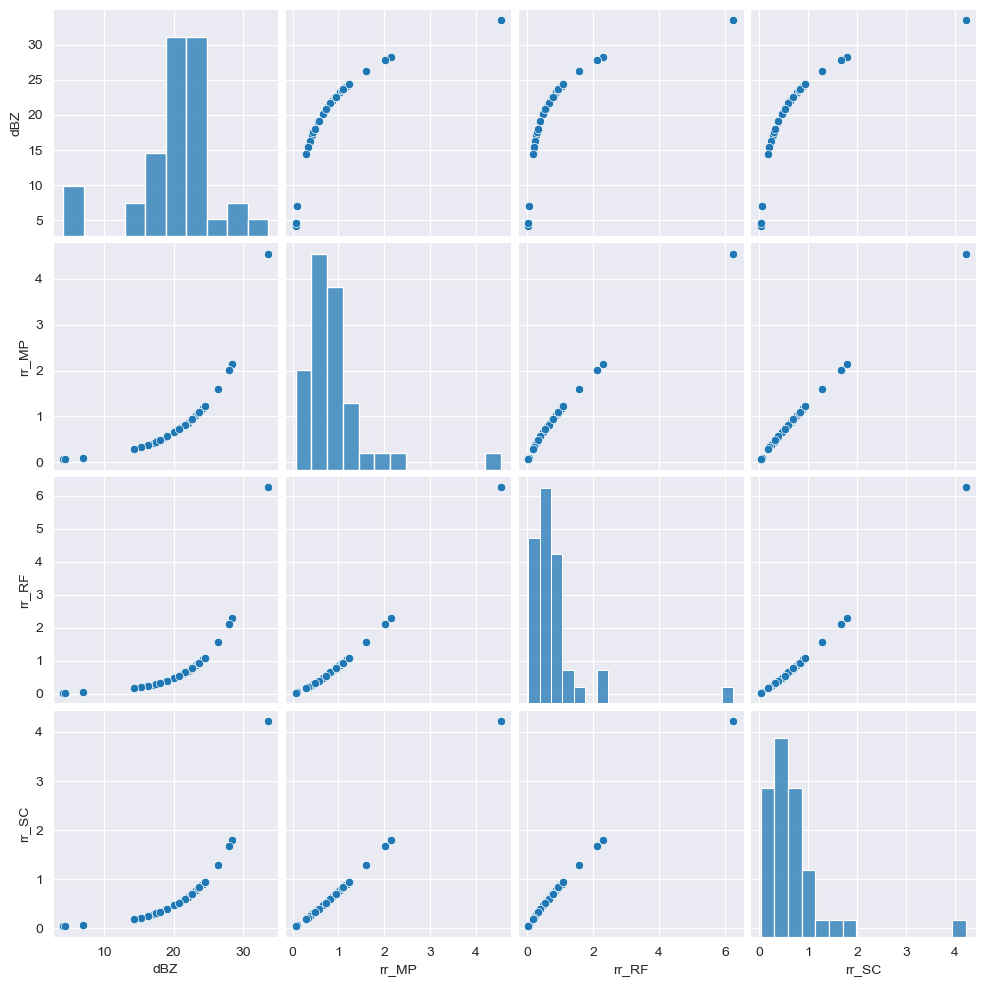

In [33]:
#cols_to_plot = ['dBz_c1', 'dBZ_c2', 'dBZ_p1', 'dBZ_p2', 'rain_truth','rain_intensity']
sns.set_style({'font.family':'Tahoma'})
#sns.set(font_scale=2.5)
sns.set_style('darkgrid')
pplot=sns.pairplot(df)